HW 3 of Computational methods 540

Review of basic statistics:MVN

Generate random 2000 MVN data, $p=3$ 

(the covariance matrix should be positive semi-definite symmetric matrix)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import *
%matplotlib inline
np.random.seed(42)

In [2]:
mu3 = np.array([5,1,2])
C = np.random.random((3,3))
cov3 = C @ C.T # positive semi-definite

In [3]:
print(f"The trivariate normal distribution mean vector is  {mu3} \nThe covariance matrix:\n{cov3}")

The trivariate normal distribution mean vector is  [5 1 2] 
The covariance matrix:
[[1.57995312 0.48673782 1.28525324]
 [0.48673782 0.40706809 0.26368252]
 [1.28525324 0.26368252 1.11497408]]


In [4]:
n = 2000 #2000 samples from x1 x2 x3
data = np.random.multivariate_normal(mu3, cov3, size=n)
x1 = data[:, 0]
x2 = data[:, 1]
x3 = data[:,2]

(1) Compare sample means $\bar{x}_{l}$ and population means $\mu_{i},$ where $i=1,2,3$.

In [5]:
# np.mean(x1),np.mean(x2),np.mean(x3)

In [6]:
print(f"The trivariate normal sample means are {np.mean(x1),np.mean(x2),np.mean(x3)} \nThe population means are {mu3}")

The trivariate normal sample means are (5.079467800927094, 1.0199059704513431, 2.0676023746970795) 
The population means are [5 1 2]


(2) Compare sample variances $s_{i}^{2}$ and population variances $\sigma_{i}^{2}$, where $i=1,2,3$.

In [7]:
# np.var(x1),np.var(x2),np.var(x3)

In [8]:
print(f"The sample variances are{np.var(x1),np.var(x2),np.var(x3)} \nThe population variances are {cov3[0,0,],cov3[1,1],cov3[2,2]}")

The sample variances are(1.5634255838183972, 0.39517790831443744, 1.1075923347544567) 
The population variances are (1.5799531238872833, 0.40706808724152177, 1.1149740788550655)


(3) Compare sample covariances $\widehat{\operatorname{Cov}}\left(x_{i}, x_{j}\right)=\hat{\sigma}_{i j}$ and population covariances $\sigma_{i j},$ where $i, j=1,2,3, i \neq j$

In [9]:
# cov3[0,1],cov3[1,2],cov3[0,2]

In [10]:
# np.cov(x1,x2)[1][0],np.cov(x2,x3)[1][0],np.cov(x1,x3)[1][0]

In [11]:
print(f"The sample covariances are {np.cov(x1,x2)[1][0],np.cov(x2,x3)[1][0],np.cov(x1,x3)[1][0]} \nTHepopulation covariances  are {cov3[0,1],cov3[1,2],cov3[0,2]}")

The sample covariances are (0.4771032394764352, 0.2614232308595192, 1.276246614864397) 
THepopulation covariances  are (0.4867378171972655, 0.2636825197885506, 1.285253243591714)


(4) Compare sample correlations $r_{i j}=\hat{\rho}_{i j}$ and population correlations $\rho_{i j},$ where $i, j=$ $1,2,3, i \neq j$

In [12]:
#sample correlations: rhij
#population correlations: rij

rh12=np.corrcoef(x1,x2)[1][0],
rh13=np.corrcoef(x1,x3)[1][0],
rh23=np.corrcoef(x2,x3)[1][0]

r12 = cov3[0,1]/np.sqrt(cov3[0,0] * cov3[1,1]),
r13 = cov3[0,2]/np.sqrt(cov3[0,0] * cov3[2,2]),

r23 = cov3[1,2]/np.sqrt(cov3[1,1] * cov3[2,2])

In [13]:
print(f"The sample correlations are {r12,r13,r23} \nThe population correlations are {rh12,rh13,rh23}")


The sample correlations are ((0.6069311964606676,), (0.9683541589636978,), 0.3913951380464573) 
The population correlations are ((0.6066807675139408,), (0.9693683227746348,), 0.39494868877027656)


(5) Calculate conditional expectation $E\left[X_{1} \mid x_{2}=6\right], E\left[X_{3} \mid x_{1}=10\right]$ and conditional variance $V\left[X_{1} \mid x_{2}=6\right], V\left[X_{3} \mid x_{1}=10\right]$

(6) Plot the histograms of $x_{1}, x_{2}$ and $x_{3}$.

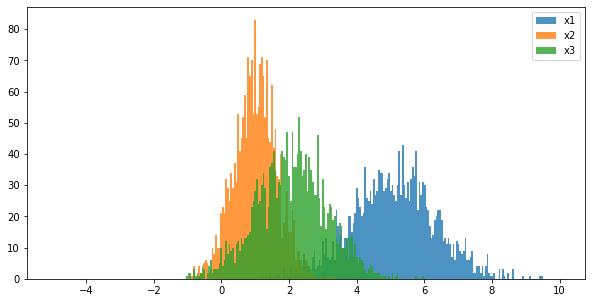

In [14]:
plt.rcParams['figure.figsize']=(10,5)
bins = np.linspace(-5, 10, 300)
plt.hist(x1, bins, alpha=0.8, label='x1')
plt.hist(x2, bins, alpha=0.8, label='x2')
plt.hist(x3, bins, alpha=0.8, label='x3')
plt.legend(loc='upper right')
plt.show()

(7) The joint p.d.f. of $X_{1}, X_{2}$ and $X_{3}$ is $f\left(x_{1}, x_{2}, x_{3}\right),$ calculate $f(0,0,0)$ and $f(0,0,1.2)$

In [15]:
# cov3[0,0],cov3[0,1],cov3[0,2],cov3[1,0],cov3[1,1],cov3[1,2],cov3[2,0],cov3[2,1],cov3[2,2]

(8) Plot the scatter plots of $X_{1} \& X_{2}, X_{1} \& X_{3}$ and $X_{2} \& X_{3}$.

<function matplotlib.pyplot.show(close=None, block=None)>

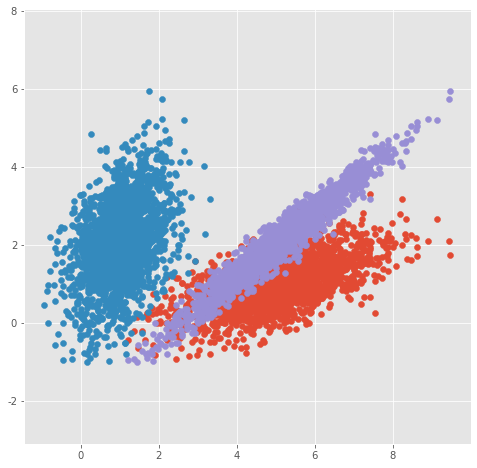

In [23]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=(8,8)
X12 = np.vstack((x1,x2)).T
X23 = np.vstack((x2,x3)).T
X13 = np.vstack((x1,x3)).T
plt.scatter(X12[:,0],X12[:,1],label='x1,x2')
plt.scatter(X23[:,0],X23[:,1],label='x2,x3')
plt.scatter(X13[:,0],X13[:,1],label='x1,x3')
# plt.title("Scatter plots of r.v.s (x1,x2), (x2,x3) and (x1,x3)")
plt.axis('equal')
# plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

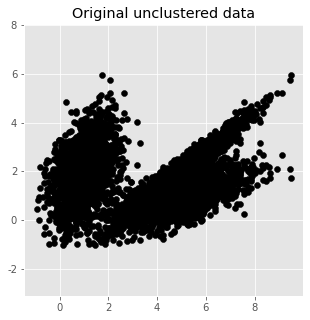

In [27]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (5, 5)
X12 = np.vstack((x1, x2)).T
X23 = np.vstack((x2, x3)).T
X13 = np.vstack((x1, x3)).T
plt.scatter(X12[:, 0], X12[:, 1],c="black",label='x1,x2')
plt.scatter(X23[:, 0], X23[:, 1],c="black", label='x2,x3')
plt.scatter(X13[:, 0], X13[:, 1], c="black", label='x1,x3')
plt.title("Original unclustered data")
plt.axis('equal')
# plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

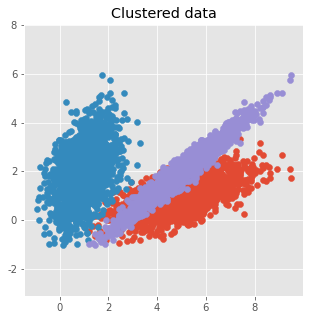

In [28]:
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (5, 5)
X12 = np.vstack((x1, x2)).T
X23 = np.vstack((x2, x3)).T
X13 = np.vstack((x1, x3)).T
plt.scatter(X12[:, 0], X12[:, 1], label='x1,x2')
plt.scatter(X23[:, 0], X23[:, 1], label='x2,x3')
plt.scatter(X13[:, 0], X13[:, 1], label='x1,x3')
plt.title("Clustered data")
plt.axis('equal')
# plt.legend()
plt.show

[GMM](https://blog.csdn.net/jojozhangju/article/details/19182013)